In [126]:
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
import numpy as np

# 1. Предобработка


Выберите набор данных из списка в конце задания. Обработайте данные в нём:

1. Обработайте недостающие данные в датасете - удалить/заменить/etc, обоснуйте своё решение
1. Постройте как минимум по 1 графику каждого типа из представленных на лекции. Для каждого построенного графика объясните почему отображённые данные лучше всего представимы именно этим типом графика
1. Сохраните датасет


1. Создайте новую колонку, отображающую характеристику набора данных. Новая колонка должна обладать смысловой нагрузкой. 

    Например, для набора данных о прямоугольниках с двумя колонками width и height будет корректно придумать колонку perimeter или area, равную width * height. Некорректно будет придумать колонку width2, равную width * 2, потому что эта информация не будет нести полезную информацию о фигурах

Не оценивается баллами, но даёт очки уважения:
1. Выдвиньте 2 гипотезы о данных. Например, для датасета codeforces достаточно интересной гипотезой может быть "простые задачи (рейтинг меньше 1500) почти всегда решаются больше 5000 раз"


Наборы данных:

1. [Spotify Tracks DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) - характеристики треков в spotify
1. [VKontakte Dataset of Users' Textual Data](https://www.kaggle.com/oldaandozerskaya/vkontakte-dataset-of-users-textual-data) 1. основная информация 10к профилей ВК
1. [Data Science for COVID-19](https://www.kaggle.com/kimjihoo/coronavirusdataset) - информация о распространении коронавируса в Южной Корее в 2020 году
1. [Dota 2 - Pro Players Matches Results 2019 ~ 2021](https://www.kaggle.com/devinanzelmo/dota-2-matches?select=player_ratings.csv) - информация матчей игроков DoTA 2. Если данные не влезают в память, можно воспользоваться [аналогом pandas](https://dask.org/) для обработки вне RAM
1. [GPS Data of Seabirds](https://www.kaggle.com/saurabhshahane/predicting-animal-behavior-using-gps) - данные о миграции птиц
1. [FAANG Historical Stock Price Data](https://www.kaggle.com/specter7/amazon-amzn-historical-stock-price-data) -  данные о биржевых котировках компаний FAANG c 2016 по 2021 год
1. [NBA 2k20 player dataset](https://www.kaggle.com/isaienkov/nba2k20-player-dataset) - информация об игроках NBA
1. [Anime dataset](https://www.kaggle.com/thunderz/anime-dataset?select=user_data.csv) - данные о просмотре аниме пользователями с сайта myAnimeList

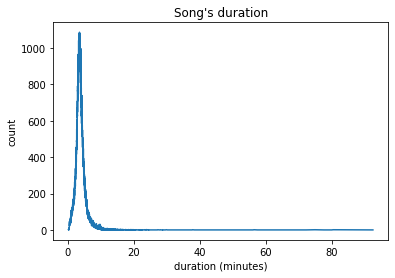

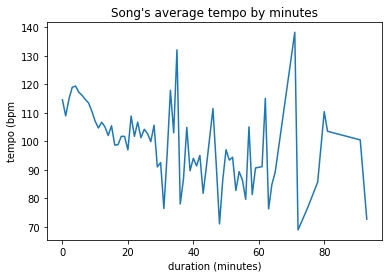

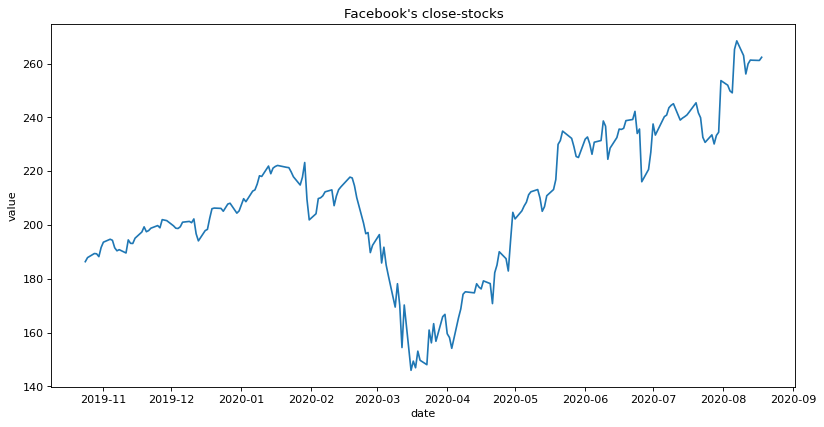

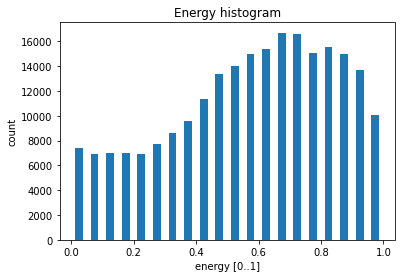

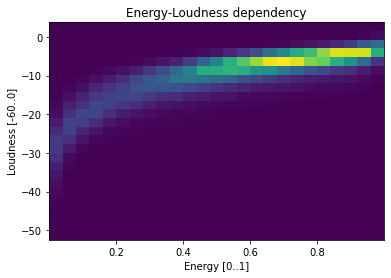

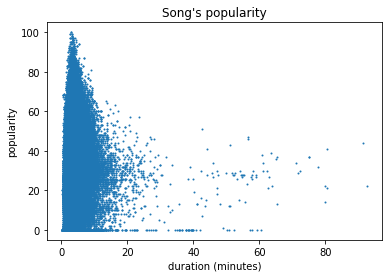

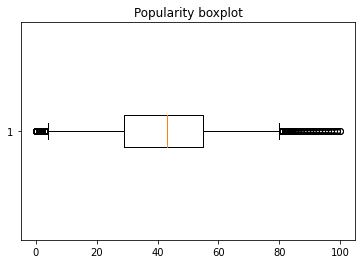

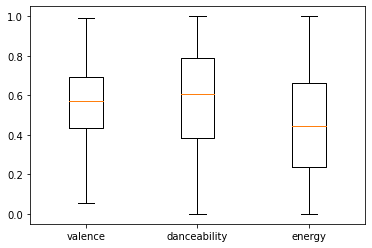

In [127]:


from datetime import datetime, timedelta

df = pd.read_csv('data\\SpotifyFeatures.csv')

### Plot №1

df_pop = pd.DataFrame.from_records(df, columns=['duration_ms'])
df_pop.duration_ms = round(df_pop.duration_ms / (1000 * 60), 2)
plt.plot(df_pop.duration_ms.value_counts().sort_index())
plt.title("Song's duration")
plt.xlabel('duration (minutes)')
plt.ylabel('count')
plt.show()

### Plot №2

df_en = pd.DataFrame.from_records(df, columns=['duration_ms', 'tempo'])
df_en.duration_ms = round(df_en.duration_ms / (1000 * 60), 0)
df_en = df_en.sort_values('duration_ms').groupby('duration_ms').mean()

plt.plot(df_en)
plt.title("Song's average tempo by minutes")
plt.xlabel('duration (minutes)')
plt.ylabel('tempo (bpm')
plt.show()

### Plot №3
df_stock = pd.read_csv('data\\Facebook.csv')
df_stock.Date = pd.to_datetime(df_stock.Date)
df_stock = df_stock[(df_stock.Date > (df_stock.Date.iloc[-1] - timedelta(days=300)))]

plt.figure(figsize=(12, 6), dpi=80)
plt.title("Facebook's close-stocks")
plt.xlabel('date')
plt.ylabel('value')
plt.plot(df_stock.Date, df_stock.Close)
plt.show()


### Гистограмма

plt.hist(
    df.energy,
    rwidth=0.5,
    bins=20
)
plt.title("Energy histogram")
plt.xlabel('energy [0..1]')
plt.ylabel('count')
plt.show()

### 2D-Гистограмма
plt.hist2d(
    df.energy,
    df.loudness,
    bins=25
)
plt.title("Energy-Loudness dependency")
plt.xlabel('Energy [0..1]')
plt.ylabel('Loudness [-60..0]')
plt.show()

### Scatter
plt.scatter(
    df.duration_ms / (1000 * 60),
    df.popularity,
    s=1
)
plt.title("Song's popularity")
plt.xlabel('duration (minutes)')
plt.ylabel('popularity')
plt.show()

###
plt.boxplot(df.popularity, vert=False, whis=0.99)
plt.title("Popularity boxplot")
plt.show()

###
df_bp = pd.DataFrame.from_records(df, columns=['valence', 'danceability', 'energy'])
plt.boxplot(df_bp, labels=df_bp.columns)
plt.show()


In [128]:
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


# 2. Интерполяция кривой

Сгенерируйте от 5 до 20 точек со случайными разными координатами (x, y), расположите их на координатной плоскости

1. С помощью библиотеки scipy примените один из её [алгоритмов интерполяции](https://docs.scipy.org/doc/scipy/reference/interpolate.html) к сгенерированным данным
1. Изучите математический подход метод выбранного алгоритма интерполяции в scipy. Найдите и продемонстрируйте при сдаче реализацию метода в исходном коде библиотеки scipy. Найти можно в [github репозитории проекта](https://github.com/scipy/scipy)
1. Выберите среди методов интерполяции в scipy любой другой метод интерполяции (кроме линейной интерполяций). Реализуйте выбранный метод без использования сторонних библиотек. Разрешается использовать numpy для упрощения математичеких вычислений
1. Визуализируйте кривую интерполяции библиотечного и вашего алгоритмов с помощью  matplotlib. Сравните качество интерполяции своего и библиотечного методов, объясните разницу в качестве

In [129]:
class PolynomCustom:
    def __init__(self, input_list):
        self.pol = input_list  # [a, b, c, ...] = a + bx + cx^2 + ...

    def plus(self, anotherPol):
        max_size = max(self.pol.size, anotherPol.size)
        a_list = np.concatenate([self.pol, np.zeros(max_size - self.pol.size)])
        b_list = np.concatenate([anotherPol, np.zeros(max_size - anotherPol.size)])
        self.pol = a_list + b_list

    def mult(self, anotherPol):
        output = np.array([0.0] * ((self.pol.size - 1) + (anotherPol.size - 1) + 1))

        for i in range(self.pol.size):
            m_curr = self.pol[i]
            for j in range(anotherPol.size):
                n_curr = anotherPol[j]
                output[i + j] += m_curr * n_curr
        self.pol = output

    def set(self, x):
        set_pol_res = 0.0
        for i in range(self.pol.size):
            set_pol_res += self.pol[i] * (x ** i)
        return set_pol_res

[Интерполяционный многочлен Лагранжа](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%BC%D0%BD%D0%BE%D0%B3%D0%BE%D1%87%D0%BB%D0%B5%D0%BD_%D0%9B%D0%B0%D0%B3%D1%80%D0%B0%D0%BD%D0%B6%D0%B0)

[Линейная интерполяция](https://ru.wikipedia.org/wiki/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D1%8F)

В scipy реализован в `_call_linear`, `_evaluate`

In [130]:
def custom_lagrange(xl_list, yl_list):
    out_pol = PolynomCustom(np.array([0]))
    for i in range(len(yl_list)):
        curr_pol = PolynomCustom(np.array([1]))
        denominator = 1
        for j in range(len(xl_list)):
            if i != j:
                curr_pol.mult(np.array([-xl_list[j], 1]))
                denominator *= (xl_list[i] - xl_list[j])
        curr_pol.mult(np.array([yl_list[i] / denominator]))
        out_pol.plus(curr_pol.pol)
    return out_pol

Original lagrange: 0.00299072265625
Custom lagrange  : 0.0


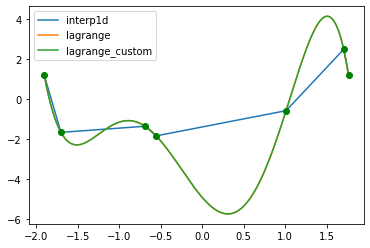

In [143]:
from scipy.interpolate import interp1d
from scipy.interpolate import lagrange
import time

X_RANGE = [-2.0, 2.5]
Y_RANGE = [-2.0, 2.5]

#def fun(x_var): return np.cos(x_var) * np.sin(np.pi * x_var)


dotCount = randint(5, 8)

x_list = np.random.uniform(low=X_RANGE[0], high=X_RANGE[1], size=dotCount)
x_list = np.sort(x_list)
#y_list = fun(x_list)
y_list = np.random.uniform(low=Y_RANGE[0], high=Y_RANGE[1], size=dotCount)

x_np = np.linspace(min(x_list), max(x_list), 1000)

interp1d_val = interp1d(x=x_list, y=y_list)

start_time = time.time()
lagrange_val = lagrange(x=x_list, w=y_list)
lagrange_time = time.time() - start_time

start_time = time.time()
custom_lagrange_val = custom_lagrange(x_list, y_list)
custom_lagrange_time = time.time() - start_time

print("Original lagrange: " + str(lagrange_time))
print("Custom lagrange  : " + str(custom_lagrange_time))
plt.plot(x_np, interp1d_val(x_np), label='interp1d')
plt.plot(x_np, lagrange_val(x_np), label='lagrange')
plt.plot(x_np, custom_lagrange_val.set(x_np), label='lagrange_custom')
#plt.plot(x_np, fun(x_np), '--', label='function')
plt.plot(x_list, y_list, 'go')
plt.legend()
plt.show()



# 3. Быстрая гистограмма

Иногда хочется получить дискретное распределение из N колонок. Но пока что для этого у нас есть только plt.hist(), которая тратит много времени на отрисовку графика. Вам предлагается реализовать свою функцию построения дискретного распределения

1. Алгоритм должен получать на вход список чисел и количество колонок гистограммы. Возвращать нужно значения столбцов (ось абсцисс гистограммы) и количество значений, принадлежащее столбцу (ось ординат гистограммы). Пример с использованием plt показан ниже, сигнатура функции также показана ниже
1. Изучите функцию [plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). Это такая же гистограмма как plt.hist, но в отличие от hist требуется явно указывать высоту колонок и их название
1. С помощью результатов своего алгоритма и plt.bar постройте гистограмму по массиву из 50+ случайных чисел. Графики plt.bar по вашему алгоритму и plt.hist() должны совпадать, что подтвердит корректность работы вашего алгоритма
1. Сравните скорость построения распределения по массиву чисел с помощью своего алгоритма и с помощью plt.hist. В jupyter рекомендуется использовать built-in magic commands, а именно timeit. Но можно обойтись и ручными измерениями времени выполнения

Значения колонок: [3. 2. 2. 2.]
Названия колонок: [1.   1.75 2.5  3.25 4.  ]


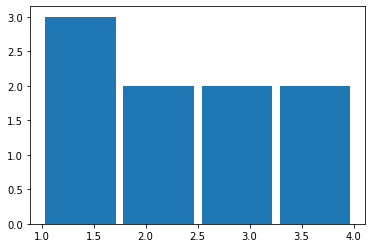

In [132]:
# Пример гистограммы с помощью plt.hist()
import matplotlib.pyplot as plt

array = [1, 1, 2, 3, 4, 1, 2, 3, 4]

value_counts, bins_names, visual_figure = plt.hist(array,
                                                   bins=len(set(array)),
                                                   rwidth=0.9)
# Параметр rwidth и визуализацию в своей функции реализовывать не требуется
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

In [133]:
from typing import List, Tuple, Union


def fast_hist(array: List[Union[int, float]],
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists: 
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    if bins <= 0: raise Exception("Incorrect count of bins")

    minimum, maximum = min(array), max(array)
    if minimum == maximum: minimum, maximum = minimum - bins, minimum + bins

    width = maximum - minimum

    delta = width / bins
    output_val = np.zeros(bins)

    for elem in array:
        bin_num = min(int((elem - minimum) / delta), (bins - 1))
        output_val[bin_num] += 1

    output_bins = np.arange(minimum, maximum, delta)

    return output_val, output_bins

Current array: [0, ..., 1], size = 6
--- 0.0 seconds [custom] ---
--- 0.007491350173950195 seconds [orig  ] ---
=======================True=======================
Current array: [1, ..., 4], size = 9
--- 0.0 seconds [custom] ---
--- 0.009486913681030273 seconds [orig  ] ---
=======================True=======================
Current array: [90, ..., 83], size = 100
--- 0.0009958744049072266 seconds [custom] ---
--- 0.006981849670410156 seconds [orig  ] ---
=======================True=======================
Current array: [1, ..., 84], size = 250
--- 0.000997781753540039 seconds [custom] ---
--- 0.027039527893066406 seconds [orig  ] ---
=======================True=======================
Current array: [29, ..., 4], size = 1000
--- 0.005983114242553711 seconds [custom] ---
--- 0.08480143547058105 seconds [orig  ] ---
=======================True=======================
Current array: [76, ..., 14], size = 100
--- 0.0 seconds [custom] ---
--- 0.11070466041564941 seconds [orig  ] ---
========

<Figure size 432x288 with 0 Axes>

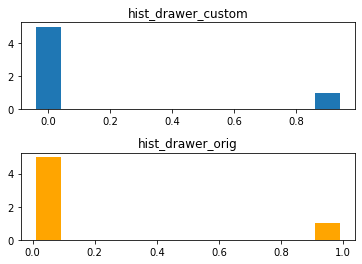

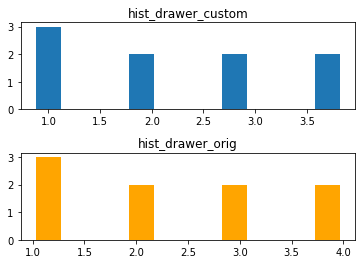

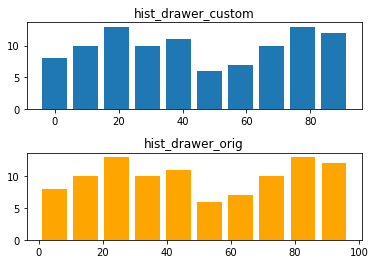

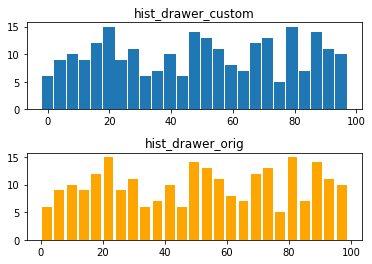

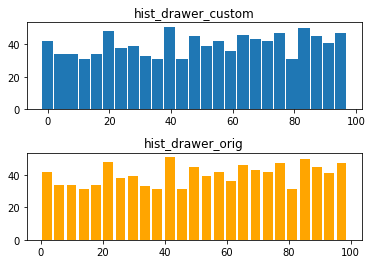

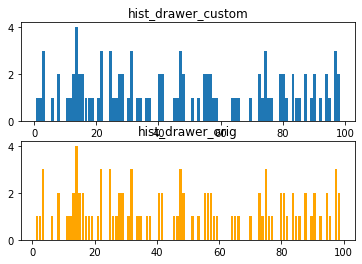

In [137]:
import time

custom_hist_time = []
orig_hist_time = []

def hist_drawer_custom(input_list, bins_count, inp_plot):
    start_time = time.time()
    val_list, bin_list = fast_hist(input_list, bins_count)
    bar_width = abs(bin_list[0] - bin_list[-1]) / (len(bin_list) + 1)
    curr_time = time.time() - start_time
    print("--- %s seconds [custom] ---" % curr_time)
    custom_hist_time.append(curr_time)

    inp_plot.title.set_text('hist_drawer_custom')
    inp_plot.bar(bin_list, val_list, bar_width )
    #print('[custom] Значения колонок:', val_list)
    #print('[custom] Названия колонок:', bin_list)
    return val_list


def hist_drawer_orig(input_list, bins_count, inp_plot):
    start_time = time.time()
    val_list, bin_list, visual_plot = inp_plot.hist(input_list,
                                                    bins=bins_count,
                                                    rwidth=0.8,
                                                    color='orange'
                                                    )
    inp_plot.title.set_text('hist_drawer_orig')
    curr_time = time.time() - start_time
    print("--- %s seconds [orig  ] ---" % curr_time)
    orig_hist_time.append(curr_time)

    #print('[orig  ] Значения колонок:', val_list)
    #print('[orig  ] Названия колонок:', bin_list)
    return val_list


def draw_hists(input_list, bins_count):
    plt.subplots_adjust(hspace=0.5)
    fig, (ax1, ax2) = plt.subplots(2, 1)
    print("Current array: [{0}, ..., {1}], size = {2}".format(input_list[0], input_list[-1], len(input_list)))
    list1 = hist_drawer_custom(input_list, bins_count, ax1)
    list2 = hist_drawer_orig(input_list, bins_count, ax2)

    print("=" * 23 + str(np.array_equal(list1, list2)) + "=" * 23)



draw_hists([0] * 5 + [1], 10)
draw_hists(array, 10)
draw_hists(np.random.randint(100, size=100), 10)
draw_hists(np.random.randint(100, size=250), 25)
draw_hists(np.random.randint(100, size=1000), 25)
draw_hists(np.random.randint(100, size=100), 100)



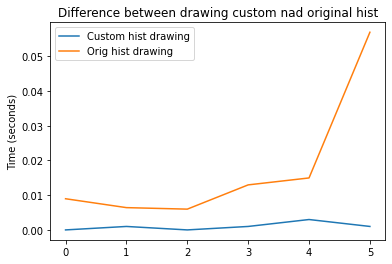

In [135]:
plt.title("Difference between drawing custom nad original hist")
plt.plot(custom_hist_time, label="Custom hist drawing")
plt.plot(orig_hist_time, label="Orig hist drawing")
plt.ylabel('Time (seconds)')
plt.legend()